In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn

In [2]:
### 1000 samples
n_samples = 1000
### creating dataset with added noise
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


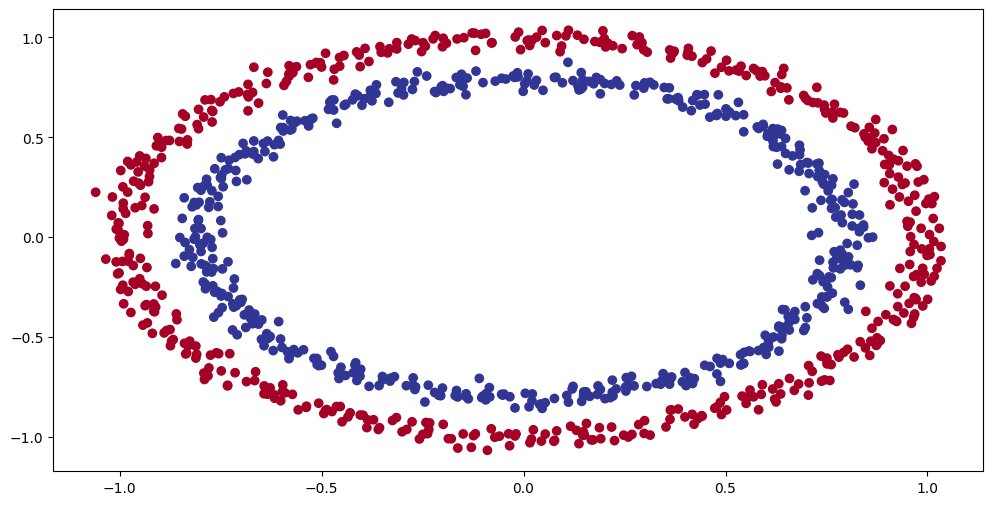

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

`Improve the previous Model`

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
## accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [7]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6132,  0.3829],
                      [-0.5929, -0.6382],
                      [-0.2662, -0.2968],
                      [ 0.4975,  0.4236],
                      [ 0.0732, -0.3019],
                      [ 0.5858,  0.0550],
                      [-0.1825, -0.1817],
                      [-0.2378, -0.4803],
                      [-0.5878, -0.2222],
                      [-0.2397,  0.1296]])),
             ('layer_1.bias',
              tensor([-0.6373, -0.6023, -0.5625,  0.2639,  0.1991,  0.2519, -0.4525,  0.3858,
                       0.4357,  0.4632])),
             ('layer_2.weight',
              tensor([[-0.2511,  0.0263,  0.2538, -0.1598, -0.1335,  0.1850, -0.0638, -0.1938,
                        0.2275, -0.1996],
                      [ 0.2798, -0.1240,  0.0762, -0.1979,  0.0884, -0.0961, -0.1702,  0.2588,
                        0.2392,  0.1828],
                      [-0.1054,  0.0915, -0.2391,  0.1781,  0.0718,  0.1

In [8]:
## loss function
loss_fn = nn.BCEWithLogitsLoss()

## create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [14]:
torch.manual_seed(42)

epochs = 1000

## put data in target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## training
for epoch in range(epochs):
  model_1.train()
  ## forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) ## logits -> pred probs -> pred labels
  ## loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  ## optimizer zero grad
  optimizer.zero_grad()
  ## loss backward
  loss.backward()
  ## optimizer step
  optimizer.step()
  ## testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}% | Acc: {acc:.2f}% | Test_loss: {test_loss:.5f}% | Test_acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 100 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 200 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 300 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 400 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 500 | Loss: 0.69298% | Acc: 51.12% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 600 | Loss: 0.69298% | Acc: 51.00% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 700 | Loss: 0.69298% | Acc: 51.00% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 800 | Loss: 0.69298% | Acc: 51.00% | Test_loss: 0.69468% | Test_acc: 46.00
Epoch: 900 | Loss: 0.69298% | Acc: 51.00% | Test_loss: 0.69468% | Test_acc: 46.00


In [21]:
### create data(linear)

weight = 0.7
bias = 0

start = 0
end = 1
step = 0.01

X_linear = torch.arange(start, end, step).unsqueeze(dim=1)
y_linear = weight * X_linear + bias

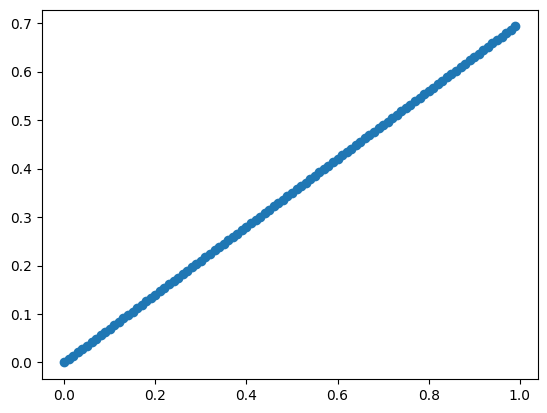

In [22]:
plt.scatter(X_linear, y_linear)

In [23]:
train_split = int(0.8 * len(X_linear))
X_train_linear = X_linear[:train_split]
y_train_linear = y_linear[:train_split]
X_test_linear = X_linear[train_split:]
y_test_linear = y_linear[train_split:]

In [24]:
(X_train_linear.shape, y_train_linear.shape), (X_test_linear.shape, y_test_linear.shape)

((torch.Size([80, 1]), torch.Size([80, 1])),
 (torch.Size([20, 1]), torch.Size([20, 1])))

In [25]:
len(X_train)

800

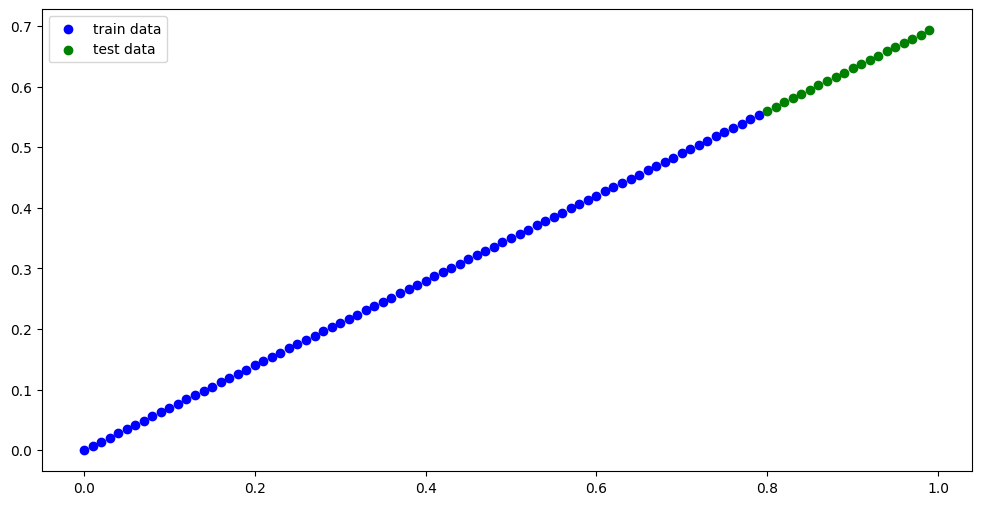

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(X_train_linear, y_train_linear, c="b", label="train data")
plt.scatter(X_test_linear, y_test_linear, c="g", label="test data")
plt.legend()
plt.show()

In [28]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

`adjusting model 1`

In [29]:
model_2 = nn.Sequential(
  nn.Linear(in_features=1, out_features=10),
  nn.Linear(in_features=10, out_features=10),
  nn.Linear(in_features=10, out_features=1)
).to(device)

In [30]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
## loss
loss_fn = nn.L1Loss()
## optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [32]:
## train the model
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_2.train()
  ## forward
  y_pred = model_2(X_train_linear)
  ## loss
  loss = loss_fn(y_pred, y_train_linear)
  ## optimizer zero grad
  optimizer.zero_grad()
  ## loss backward
  loss.backward()
  optimizer.step()
  ## testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_linear)
    test_loss = loss_fn(test_pred, y_test_linear)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.45986 | Test_loss: 0.61103
Epoch: 100 | Loss: 0.02706 | Test_loss: 0.02242
Epoch: 200 | Loss: 0.01908 | Test_loss: 0.03738
Epoch: 300 | Loss: 0.01446 | Test_loss: 0.04252
Epoch: 400 | Loss: 0.01444 | Test_loss: 0.04328
Epoch: 500 | Loss: 0.01407 | Test_loss: 0.04222
Epoch: 600 | Loss: 0.01429 | Test_loss: 0.04070
Epoch: 700 | Loss: 0.01347 | Test_loss: 0.03941
Epoch: 800 | Loss: 0.01365 | Test_loss: 0.03891
Epoch: 900 | Loss: 0.01264 | Test_loss: 0.03686


In [35]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_linear)
y_preds

tensor([[0.5603],
        [0.5670],
        [0.5737],
        [0.5804],
        [0.5871],
        [0.5938],
        [0.6004],
        [0.6071],
        [0.6138],
        [0.6205],
        [0.6272],
        [0.6338],
        [0.6405],
        [0.6472],
        [0.6539],
        [0.6606],
        [0.6672],
        [0.6739],
        [0.6806],
        [0.6873]])

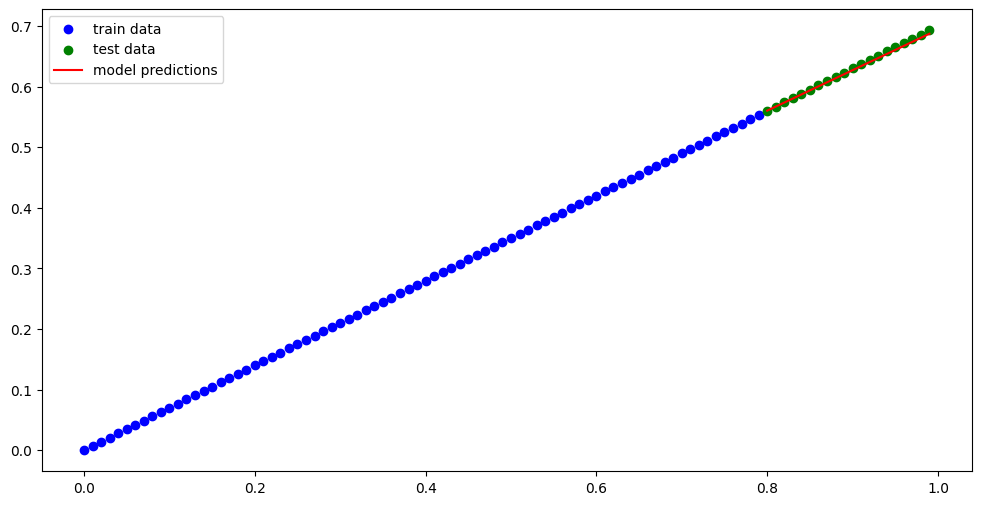

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(X_train_linear, y_train_linear, c="b", label="train data")
plt.scatter(X_test_linear, y_test_linear, c="g", label="test data")
plt.plot(X_test_linear, y_preds, c="r", label="model predictions")
plt.legend()
plt.show()